## Benchmarking Convex Hulls 2D Algorithms


#### References

- https://github.com/tkoolen/PlanarConvexHulls.jl/blob/master/perf/runbenchmarks.jl

In [22]:
using BenchmarkTools, PlanarConvexHulls, StaticArrays, Random

const T = Float64
p_jarvis = []
for n in [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
    rng = MersenneTwister(n)
    hull = ConvexHull{CCW, T}()
    sizehint!(hull, n)
    points = [rand(rng, SVector{2, T}) for _ = 1 : n]
    push!(p_jarvis, @btime jarvis_march!($hull, $points))
end

  17.767 ns (0 allocations: 0 bytes)
  18.081 ns (0 allocations: 0 bytes)
  73.775 ns (0 allocations: 0 bytes)
  174.207 ns (0 allocations: 0 bytes)
  328.356 ns (0 allocations: 0 bytes)
  1.682 μs (0 allocations: 0 bytes)
  3.982 μs (0 allocations: 0 bytes)
  8.250 μs (0 allocations: 0 bytes)
  19.543 μs (0 allocations: 0 bytes)
  41.412 μs (0 allocations: 0 bytes)


In [35]:
times_jarvis = [17.767e-9, 18.081e-9, 73.775e-9, 174.207e-9, 328.356e-9,
                1.682e-6, 3.982e-6, 8.250e-6, 19.543e-6, 41.412e-6];

In [10]:
p_jarvis[1]

ConvexHull{CCW,Float64,SArray{Tuple{2},Float64,1,2},Array{SArray{Tuple{2},Float64,1,2},1}}(SArray{Tuple{2},Float64,1,2}[[0.236033, 0.346517]])

In [11]:
using LazySets

p_andrew = []

for n in [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
    rng = MersenneTwister(n)
    points = [rand(rng, SVector{2, T}) for _ = 1 : n]
    push!(p_andrew, @btime convex_hull!($points))
end 

  6.224 ns (0 allocations: 0 bytes)
  46.164 ns (0 allocations: 0 bytes)
  327.271 ns (7 allocations: 496 bytes)
  418.784 ns (8 allocations: 640 bytes)
  396.647 ns (7 allocations: 496 bytes)
  683.952 ns (9 allocations: 784 bytes)
  855.274 ns (10 allocations: 1.09 KiB)
  922.758 ns (11 allocations: 1.42 KiB)
  893.500 ns (10 allocations: 1.09 KiB)
  1.004 μs (11 allocations: 1.42 KiB)


In [37]:
times_andrew = [6.224e-9, 46.164e-9, 327.271e-9, 418.784e-9, 396.647e-9, 683.952e-9,
                855.274e-9, 922.758e-9, 893.500e-9, 1.004e-6];

In [12]:
p_andrew[1]

1-element Array{SArray{Tuple{2},Float64,1,2},1}:
 [0.236033, 0.346517]

In [19]:
p_jarvis[1].vertices

1-element Array{SArray{Tuple{2},Float64,1,2},1}:
 [0.236033, 0.346517]

In [20]:
p_andrew[2]

2-element Array{SArray{Tuple{2},Float64,1,2},1}:
 [0.366796, 0.523879]
 [0.210256, 0.819338]

In [21]:
p_jarvis[2].vertices

2-element Array{SArray{Tuple{2},Float64,1,2},1}:
 [0.366796, 0.523879]
 [0.210256, 0.819338]

In [24]:
p_andrew[3]

4-element Array{SArray{Tuple{2},Float64,1,2},1}:
 [0.044228, 0.118147]
 [0.838358, 0.524059]
 [0.57126, 0.931515] 
 [0.30131, 0.881349] 

In [26]:
p_jarvis[3].vertices

4-element Array{SArray{Tuple{2},Float64,1,2},1}:
 [0.044228, 0.118147]
 [0.838358, 0.524059]
 [0.57126, 0.931515] 
 [0.30131, 0.881349] 

In [32]:
all([p_andrew[i] == p_jarvis[i].vertices for i in 1:10])

true

In [33]:
using Plots

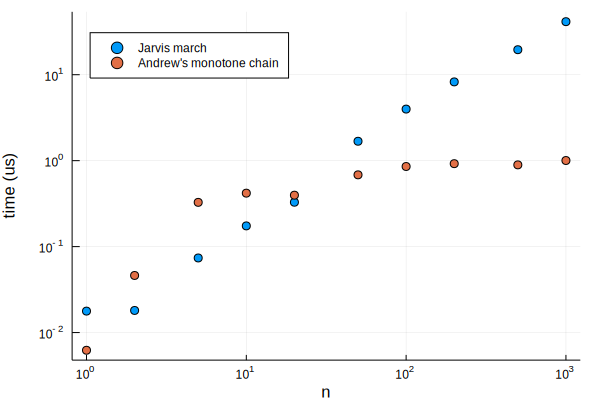

In [60]:
n = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]

plot(n, times_jarvis .* 1e6, seriestype=:scatter, xaxis=:log, yaxis=:log, linestyle=:auto,
        legend=:topleft, label="Jarvis march")

plot!(n, times_andrew .* 1e6, seriestype=:scatter, xaxis=:log, yaxis=:log, line=:dot,
         xlab="n", ylab="time (us)",
         legend=:topleft, label="Andrew's monotone chain")